In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

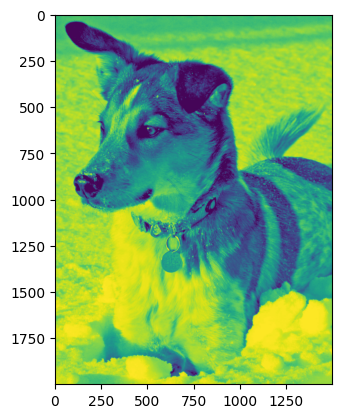

U shape: (2000, 1500)
S shape: (1500,)
Vt shape: (1500, 1500)
singular values: [2.97616664e+05 6.13327279e+04 4.79267850e+04 ... 4.78952247e+00
 4.68886762e+00 4.46755130e+00]


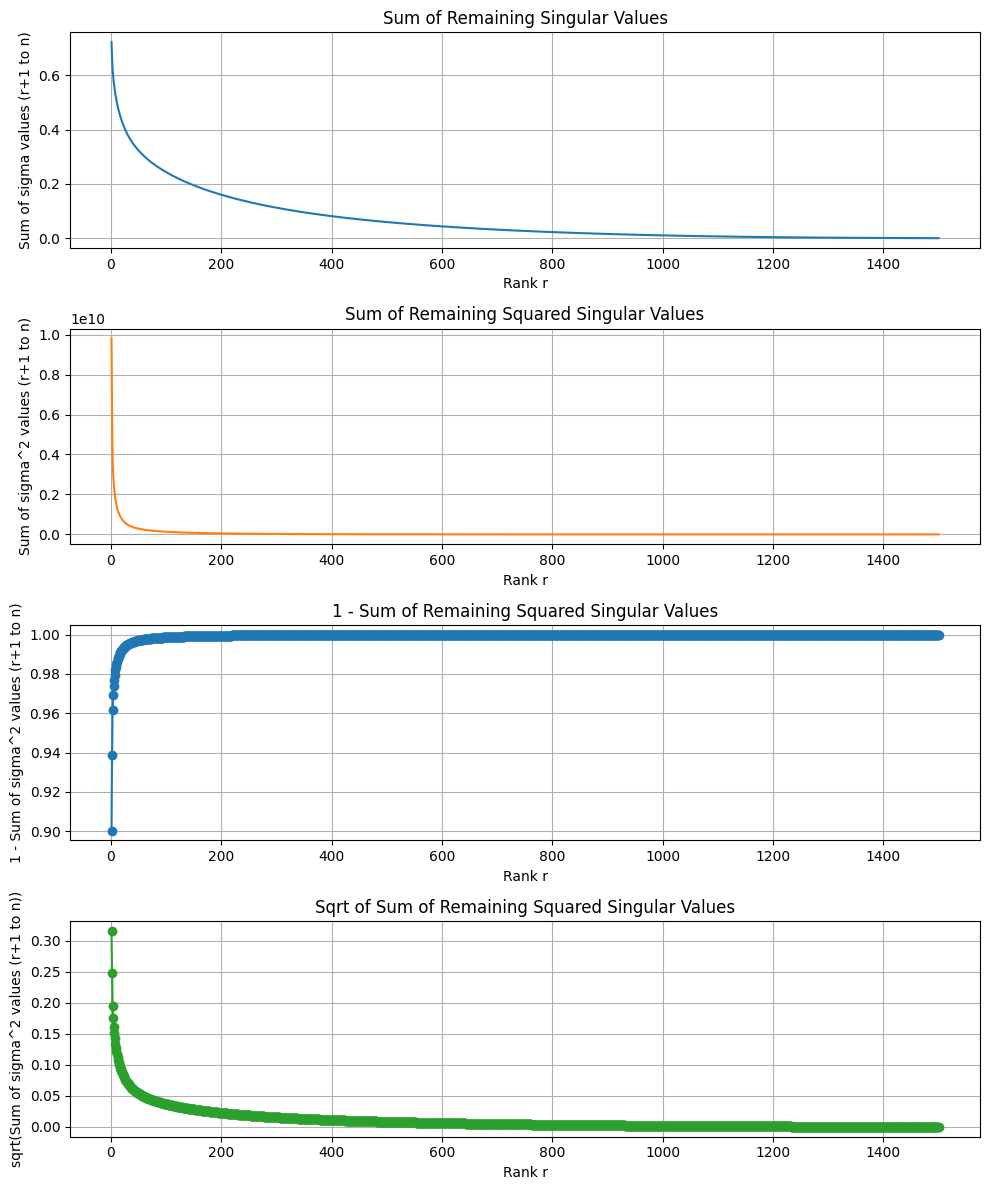

Rank needed for 99% of total sigma: 1006
Rank needed for 99% of total sigma^2: 16


In [13]:
A = imread('../DATA/dog.jpg')
X = np.mean(A, -1)  # Convert to grayscale by averaging color channels
img = plt.imshow(X)
plt.show()

U, S, Vt = np.linalg.svd(X, full_matrices=False)

print(f'U shape: {U.shape}')
print(f'S shape: {S.shape}')
print(f'Vt shape: {Vt.shape}')

n = len(S)
r_values = range(1, n + 1)
full_sum_sig = np.sum(S)
full_sum_sig_sq = np.sum(S**2)
sum_sigma = []
sum_sigma_squared = []
one_minus_sum_sig_sq_values = []
sum_sig_sq_sqrt_values = []
r_99_pct_sigma = 0
r_99_pct_sigma_sq = 0

print( "singular values:", S   )

for r in r_values:
    # Sum of singular values from r+1 to n
    if r < n:
        sum_sig = np.sum(S[r:])/full_sum_sig
        sum_sig_sq = np.sum(S[r:]**2)
        one_minus_sum_sig_sq = 1 - (sum_sig_sq / full_sum_sig_sq)
        if ( r_99_pct_sigma == 0 and sum_sig <= 0.01):
            r_99_pct_sigma = r
        if ( r_99_pct_sigma_sq == 0 and one_minus_sum_sig_sq >= 0.99):
            r_99_pct_sigma_sq = r
    else:
        sum_sig = 0
        sum_sig_sq = 0
        one_minus_sum_sig_sq = 1
    sum_sigma.append(sum_sig)
    sum_sigma_squared.append(sum_sig_sq)
    one_minus_sum_sig_sq_values.append(one_minus_sum_sig_sq)
    sum_sig_sq_sqrt_values.append(np.sqrt(sum_sig_sq)/ np.sqrt(full_sum_sig_sq))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))
ax1.plot(r_values, sum_sigma)
ax1.set_xlabel('Rank r')
ax1.set_ylabel('Sum of sigma values (r+1 to n)')
ax1.set_title('Sum of Remaining Singular Values')
ax1.grid()

ax2.plot(r_values, sum_sigma_squared, color='tab:orange')
ax2.set_xlabel('Rank r')
ax2.set_ylabel('Sum of sigma^2 values (r+1 to n)')
ax2.set_title('Sum of Remaining Squared Singular Values')
ax2.grid()

ax3.plot(r_values, one_minus_sum_sig_sq_values, 'o-')
ax3.set_xlabel('Rank r')
ax3.set_ylabel('1 - Sum of sigma^2 values (r+1 to n)')
ax3.set_title('1 - Sum of Remaining Squared Singular Values')
ax3.grid()

ax4.plot(r_values, sum_sig_sq_sqrt_values, 'o-', color='tab:green')
ax4.set_xlabel('Rank r')
ax4.set_ylabel('sqrt(Sum of sigma^2 values (r+1 to n))')
ax4.set_title('Sqrt of Sum of Remaining Squared Singular Values')
ax4.grid()

plt.tight_layout()
plt.show()

print(f'Rank needed for 99% of total sigma: {r_99_pct_sigma}'
      f'\nRank needed for 99% of total sigma^2: {r_99_pct_sigma_sq}')

What the above result means is:  
- You need about 1006 singular values to capture 99% of the *sum of singular values* $\sum \sigma_i$.  
- You need only about 16 singular values to capture 99% of the *sum of squared singular values* $\sum \sigma_i^2$, which is the energy/variance.

Why variance is better for rank selection:
- $\sigma_i^2$ corresponds to variance (energy) captured by each mode, so it aligns with reconstruction error in the least‑squares sense.  
- The Frobenius error of a rank‑$r$ approximation is $\sqrt{\sum_{i>r}\sigma_i^2}$, so minimizing error is directly tied to the squared singular values.  
- The plain sum $\sum \sigma_i$ does not reflect energy; it weights small singular values too heavily relative to their impact on error.

So the variance (squared singular values) is the natural metric for “how much of the data you’ve captured.”

Forbenius norm is the higher dimensional analogue of the Pythagorean theorem. This is because the sigma captures pure stretching and the U, V capture orthogonal bases. 

The higher-dimensional analogue of the Pythagorean theorem is the **Frobenius norm**.

Note that Frobenius norm can be dervied by taking pythogorean distance two bases at a time.

For a vector in 2D, Pythagoras says: $\|v\|^2 = v_1^2 + v_2^2$.

For a vector in $n$ dimensions: $\|v\|^2 = \sum_{i=1}^{n} v_i^2$.

For a matrix $M$, the **Frobenius norm** generalizes this:
$$\|M\|_F^2 = \sum_{i,j} M_{ij}^2$$

This is exactly the sum of squares of all entries, which is the natural extension of the distance concept to matrices. It's also equal to $\sum_i \sigma_i^2$ (the sum of squared singular values), which is why the variance metric matters—it directly measures the total energy/information in the data.